In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot
import DataFrames

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


In [2]:
using Clapeyron

glycine_data = """Clapeyron Database File
My SolidHfus Parameters
species,Mw,Tm,Hfus
glycine,75.0666,578,22000
"""

like_parameter = """Clapeyron Database File,,,,,,,,,,
SAFTgammaMie Like Parameters [csvtype = like,grouptype = SAFTgammaMie]
species,vst,Mw,S,lambda_r,lambda_a,sigma,epsilon,n_H,n_e1,n_e2
CH2,1,14.03,0.22932,19.871,6,4.8801,473.39,0,0,0
CH2OH,2,31.034,0.58538,22.699,6,3.4054,407.22,1,2,0
CH3,1,15.04,0.57255,15.05,6,4.0772,256.77,0,0,0
COOH,1,45.02,0.55593,8,6,4.3331,405.78,1,2,2
H2O,1,18.01528,1,17.02,6,3.0063,266.68,2,2,0
NH2,1,16.02,0.79675,10.254,6,3.2477,284.78,2,1,0
"""

unlike_parameter = """Clapeyron Database File,,,
SAFTgammaMie Unlike Parameters [csvtype = unlike,grouptype = SAFTgammaMie]
species1,species2,epsilon,lambda_r
CH2,CH2OH,423.17,
CH3,CH2,350.77,
CH3,CH2OH,333.2,
COOH,CH2,413.74,
COOH,CH2OH,488.18,
COOH,CH3,255.99,
COOH,NH2,285,
H2O,CH2,423.63,100
H2O,CH2OH,353.37,
H2O,CH3,358.18,100
H2O,COOH,289.76,
H2O,NH2,358.55,
NH2,CH2,348.39,
NH2,CH2OH,528.21,52.305
NH2,CH3,244.15,
"""

assoc_parameter = """Clapeyron Database File,,,,,
SAFTgammaMie Assoc Parameters [csvtype = assoc,grouptype = SAFTgammaMie]
species1,site1,species2,site2,epsilon_assoc,bondvol
CH2OH,H,CH2OH,e1,2097.9,6.2309E-29
COOH,e1,CH2OH,H,1062.1,2.1067E-28
COOH,e1,NH2,H,1446.624,1E-28
COOH,e2,CH2OH,H,997.89,2.2707E-28
COOH,e2,NH2,H,1220.143,1E-28
COOH,H,CH2OH,e1,3238.4,3.605E-29
COOH,H,COOH,H,6427.9,8.062E-31
COOH,H,NH2,e1,4000,1E-28
H2O,e1,CH2OH,H,621.68,4.25E-28
H2O,e1,COOH,H,2567.7,2.7009E-28
H2O,e1,NH2,H,1988.3,5.5824E-29
H2O,H,CH2OH,e1,2153.2,1.474E-28
H2O,H,COOH,e1,1451.8,2.8089E-28
H2O,H,COOH,e2,1252.6,1.5098E-28
H2O,H,H2O,e1,1985.4,1.0169E-28
H2O,H,NH2,e1,1460,1.796E-28
NH2,e1,CH2OH,H,2403.8,2.6192E-29
NH2,e1,NH2,H,1070.8,9.5225E-29
NH2,H,CH2OH,e1,629.88,3.4608E-28
"""

components = [("water", ["H2O"=>1]), ("ethanol", ["CH3"=>1, "CH2OH"=>1]), ("glycine", ["NH2"=>1, "CH2"=>1, "COOH"=>1])]

model = CompositeModel(components;
                       fluid = SAFTgammaMie,
                       solid = SolidHfus,
                       solid_userlocations = [glycine_data],
                       fluid_userlocations = [like_parameter,unlike_parameter,assoc_parameter])

Composite Model with 3 components:
 "water"
 "ethanol"
 "glycine"
Solid Model: SolidHfus("water", "ethanol", "glycine")
Fluid Model: SAFTgammaMie{BasicIdeal, Float64}("water", "ethanol", "glycine")

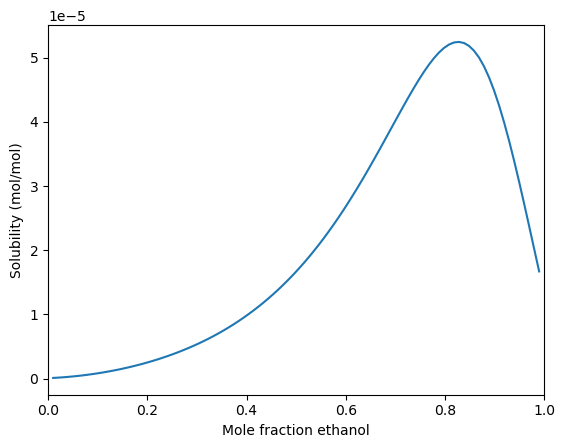

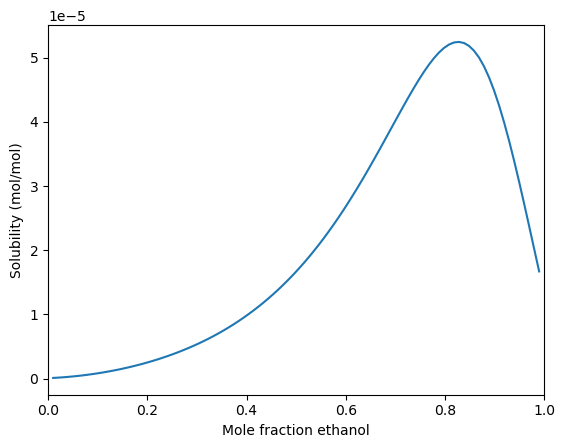

In [3]:
using Clapeyron

T = 270
p = 100000
x = LinRange(0.,1.,100)

s = zeros(length(x))

for i in 1:length(s)
    s[i] = sle_solubility(model,p,T,[x[i],1-x[i],0.];solute=["glycine"])[3]
end

plt.clf()
plt.plot(x,s)
plt.xlabel("Mole fraction ethanol")
plt.ylabel("Solubility (mol/mol)")
plt.xlim(0,1)
display(plt.gcf())